In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from prettytable import PrettyTable

In [ ]:
df = pd.read_csv('/content/train-perceptron.txt', header = None, sep = ' ')
df

,0,1,2
0,1,1.0,1
1,1,-1.0,1
2,2,2.5,2
3,0,2.0,2
4,2,3.0,2
5,4,5.0,1


In [ ]:
x1 = []
x2 = []
y1 = []
y2 = []

In [ ]:
for i in range(len(df)):
  if df.iloc[i, 2] == 1:
    x1.append(df.iloc[i, 0])
    y1.append(df.iloc[i, 1])
  else:
    x2.append(df.iloc[i, 0])
    y2.append(df.iloc[i, 1])

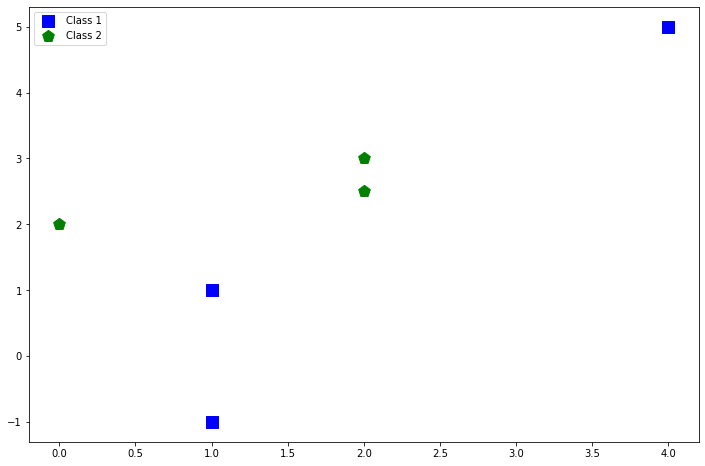

In [ ]:
plt.figure(figsize = (12, 8))
plt.scatter(x1, y1, c = 'b', marker = 's', s = 150, label = 'Class 1')
plt.scatter(x2, y2, c = 'g', marker = 'p', s = 150, label = 'Class 2')
plt.legend()
plt.show()

In [ ]:
y = []
for i in range (len(x1)):
  a = []
  a.append(x1[i]**2)
  a.append(y1[i]**2)
  a.append(x1[i] * y1[i])
  a.append(x1[i])
  a.append(y1[i])
  a.append(1)

  y.append(a)

for i in range (len(x2)):
  b = []
  b.append((x2[i]**2)*(-1))
  b.append((y2[i]**2)*(-1))
  b.append((x2[i] * y2[i])*(-1))
  b.append(x2[i]*(-1))
  b.append(y2[i]*(-1))
  b.append(1*(-1))

  y.append(b)

y = np.array(y)

In [ ]:
def oneAtaTime(y,w,lr):
  numOfIteration = 0
  totalUpdate = 0
  Class = np.zeros(len(y),)
  while numOfIteration<=1000:
    for i in range(len(y)):
      c = w.dot(y[i])
      Class[i] = c
      if c<=0:
        w = w + lr*y[i]
        totalUpdate+=1
    numOfIteration+=1
    if all(x>0 for x in Class):
        break;
        
  #print(w)
  return numOfIteration, totalUpdate

def manyAtaTime(y,w,lr):
  numOfIteration = 0
  totalUpdate = 0
  Class = np.zeros(len(y),)
  while numOfIteration<=1000:
    sum = np.zeros(len(y),)
    for i in range(len(y)):
      c = w.dot(y[i])
      Class[i] = c
      if c<=0:
        sum = np.add(y[i],sum)

    numOfIteration+=1

    if all(x>0 for x in Class):
      break;
    else:
      w = w + lr*sum
      totalUpdate+=1
      
  #print(w)
  return numOfIteration, totalUpdate

In [ ]:
learning_rate = [i/10 for i in range(1,11)]

w1 = np.zeros(6,)
w2 = np.ones(6,)

np.random.seed(42)
w3 = np.random.rand(6,)

w = np.array([w1,w2,w3])

In [ ]:
table_names = ['Initial Weight Vector All Zero', 'Initial Weight Vector All One', 'Initial Weight Vector All Random']

+--------------------------------------------------------+
|  Initial Weight Vector All Zero (Number of iteration)  |
+-----------------------+---------------+----------------+
| Alpha (Learning Rate) | One at a Time | Many at a Time |
+-----------------------+---------------+----------------+
|          0.1          |       94      |      105       |
|          0.2          |       94      |      105       |
|          0.3          |       94      |      105       |
|          0.4          |       94      |      105       |
|          0.5          |       94      |       92       |
|          0.6          |       94      |      105       |
|          0.7          |       94      |       92       |
|          0.8          |       94      |      105       |
|          0.9          |       94      |      105       |
|          1.0          |       94      |       92       |
+-----------------------+---------------+----------------+
+-------------------------------------------------------

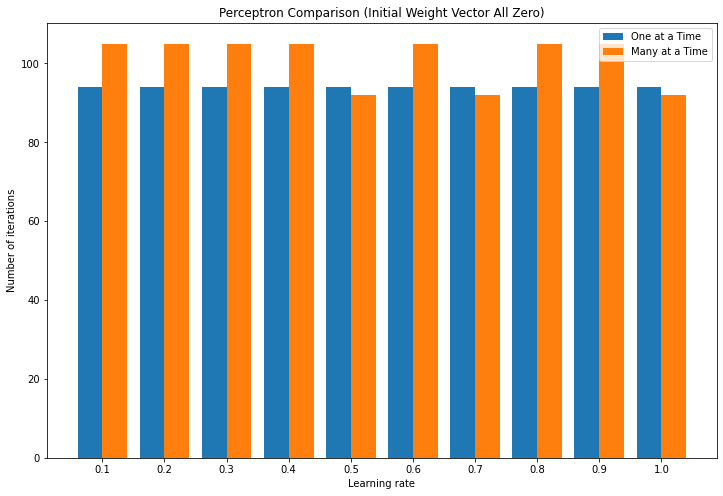

+--------------------------------------------------------+
|  Initial Weight Vector All One (Number of iteration)   |
+-----------------------+---------------+----------------+
| Alpha (Learning Rate) | One at a Time | Many at a Time |
+-----------------------+---------------+----------------+
|          0.1          |       6       |      102       |
|          0.2          |       92      |      104       |
|          0.3          |      104      |       91       |
|          0.4          |      106      |      116       |
|          0.5          |       93      |      105       |
|          0.6          |       93      |      114       |
|          0.7          |      108      |       91       |
|          0.8          |      115      |       91       |
|          0.9          |       94      |      105       |
|          1.0          |       94      |       93       |
+-----------------------+---------------+----------------+
+-------------------------------------------------------

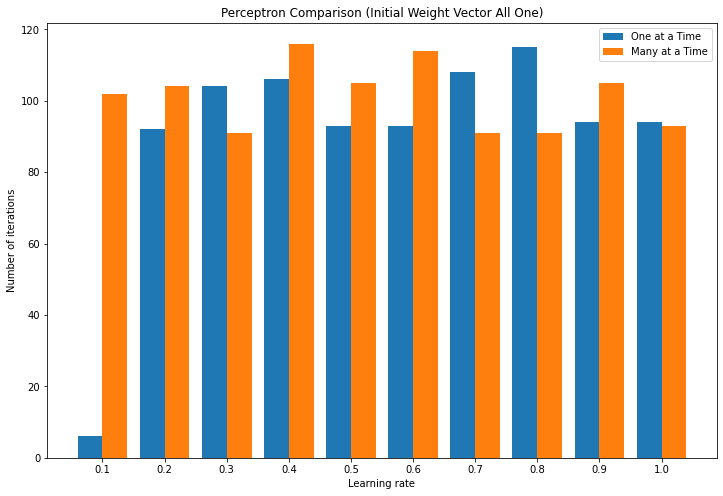

+-----------------------------------------------------------+
|   Initial Weight Vector All Random (Number of iteration)  |
+------------------------+----------------+-----------------+
| Alpha (Learning Rate)  | One at a Time  |  Many at a Time |
+------------------------+----------------+-----------------+
|          0.1           |      107       |       125       |
|          0.2           |       98       |        98       |
|          0.3           |      104       |       100       |
|          0.4           |      101       |       130       |
|          0.5           |       84       |       121       |
|          0.6           |       94       |       107       |
|          0.7           |      105       |       121       |
|          0.8           |      106       |       137       |
|          0.9           |      115       |       106       |
|          1.0           |      105       |       122       |
+------------------------+----------------+-----------------+
+-------

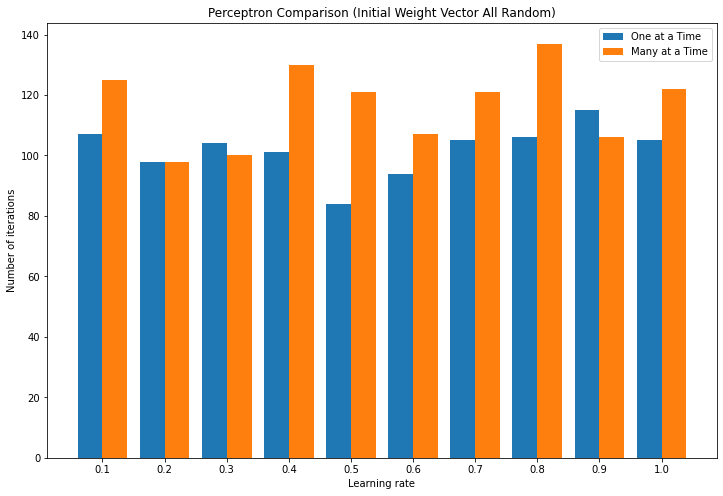

In [ ]:
for k in range(len(w)):
  numOfIter1 = []
  numOfUpdate1 = []
  numOfIter2 = []
  numOfUpdate2 = []
  for lr in learning_rate:
    p,q = oneAtaTime(y, w[k], lr)
    numOfIter1.append(p)
    numOfUpdate1.append(q)
    r,s = manyAtaTime(y, w[k], lr)
    numOfIter2.append(r)
    numOfUpdate2.append(s)
   
  t = PrettyTable(['Alpha (Learning Rate)', 'One at a Time', 'Many at a Time'])
  t.title = table_names[k] + ' (Number of iteration)'
  for i in range(len(learning_rate)):
    t.add_row([learning_rate[i], numOfIter1[i], numOfIter2[i]])
  print(t)

  t1 = PrettyTable(['Alpha (Learning Rate)', 'One at a Time', 'Many at a Time'])
  t1.title = table_names[k] + ' (Number of update)'
  for i in range(len(learning_rate)):
    t1.add_row([learning_rate[i], numOfUpdate1[i], numOfUpdate2[i]])
  print(t1)

  plt.figure(figsize = (12, 8))
  x = np.arange(len(learning_rate))
  width = 0.4
  plt.bar(x-0.2, numOfIter1, width, label = 'One at a Time')
  plt.bar(x+0.2, numOfIter2, width, label = 'Many at a Time')
  plt.xticks(x, learning_rate)
  plt.xlabel("Learning rate")
  plt.ylabel("Number of iterations")
  plt.title("Perceptron Comparison (" + table_names[k] + ')')
  plt.legend()
  plt.show()
